In [1]:
import json
from pandas import json_normalize
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

import seaborn as sns

In [2]:
# !pip install statsbombpy
# !pip install mplsoccer

pd.set_option('display.max_seq_items', None)

In [3]:
from mplsoccer.pitch import Pitch
from mplsoccer import Pitch, Sbopen
# from mplsoccer.statsbomb import read_event, EVENT_SLUG
from matplotlib import rcParams

In [4]:
wc19 =pd.read_pickle('wc19.pkl')
wc19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43744 entries, 0 to 43743
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   period                         43744 non-null  int64  
 1   pass_angle                     43744 non-null  float64
 2   pass_length                    43744 non-null  float64
 3   pass_recipient                 43744 non-null  object 
 4   possession_team                43744 non-null  object 
 5   possession_team_id             43744 non-null  int64  
 6   player                         43744 non-null  object 
 7   player_id                      43744 non-null  float64
 8   match_id                       43744 non-null  int64  
 9   pass_outcome_Complete          43744 non-null  uint8  
 10  pass_outcome_Incomplete        43744 non-null  uint8  
 11  pass_outcome_Injury Clearance  43744 non-null  uint8  
 12  pass_outcome_Out               43744 non-null 

In [5]:
wc19.pass_outcome_Unknown.value_counts()

0    43577
1      167
Name: pass_outcome_Unknown, dtype: int64

In [6]:
euro22 =pd.read_pickle('euro22.pkl')
euro22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26002 entries, 0 to 26001
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   period                         26002 non-null  int64  
 1   pass_angle                     26002 non-null  float64
 2   pass_length                    26002 non-null  float64
 3   pass_recipient                 26002 non-null  object 
 4   possession_team                26002 non-null  object 
 5   possession_team_id             26002 non-null  int64  
 6   player                         26002 non-null  object 
 7   player_id                      26002 non-null  float64
 8   match_id                       26002 non-null  int64  
 9   pass_outcome_Complete          26002 non-null  uint8  
 10  pass_outcome_Incomplete        26002 non-null  uint8  
 11  pass_outcome_Injury Clearance  26002 non-null  uint8  
 12  pass_outcome_Out               26002 non-null 

In [7]:
euro22.pass_outcome_Unknown.value_counts()


0    25959
1       43
Name: pass_outcome_Unknown, dtype: int64

In [8]:
#pitch = Pitch(pitch_type = 'statsbomb', pitch_color='#38383b',line_color='white', constrained_layout=False, tight_layout=True,view='full')

In [9]:
#Find the passes
#Draw the pitch

def playerpasses(name,comp):

    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

    pass_incomplete = ['pass_outcome_Incomplete',
                       'pass_outcome_Injury Clearance',
                            'pass_outcome_Out',
                           'pass_outcome_Pass Offside',
                           'pass_outcome_Unknown']
    
    #if thepass['team_name']==away_team_required: #
    for i,thepass in comp.iterrows():
        if thepass['player']==name and thepass['pass_outcome_Complete'] == 1:
            plot_pass_c = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ad993c',
                                         ax=ax)
        
            
            
    for i,thepass in comp.iterrows():
        
        if thepass['player']==name and thepass['pass_outcome_Complete'] == 0:
            plot_pass_i = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ba4f45',
                                     ax=ax)
        

# Set up the legend
    red_patch = mpatches.Patch(color='#ad993c', label='completed passes')
    yellow_patch = mpatches.Patch(color='#ba4f45', label='other passes')
    ax.legend(handles=[red_patch,yellow_patch], fontsize=20, loc='upper left')
    #ax.legend(["completed passes", "other passes"], facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')

# Set the title
    ax_title = ax.set_title(f'Passes', fontsize=30)

In [10]:
#Find the passes
#Draw the pitch

def playerpasses_inhalves(name,comp):

    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

    pass_incomplete = ['pass_outcome_Incomplete',
                       'pass_outcome_Injury Clearance',
                            'pass_outcome_Out',
                           'pass_outcome_Pass Offside',
                           'pass_outcome_Unknown']
    
    #if thepass['team_name']==away_team_required: #
    for i,thepass in comp.iterrows():
        if thepass['player']==name and thepass['period'] == 1:
            plot_pass_c = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ad993c',
                                         ax=ax)
        
            
            
    for i,thepass in comp.iterrows():
        
        if thepass['player']==name and thepass['period'] == 2:
            plot_pass_i = pitch.arrows(thepass['start_x'], 
                                    thepass['start_y'],
                                    thepass['end_x'],
                                    thepass['end_y'],
                                         width=2,
                                         headwidth=6, 
                                         headlength=5, 
                                         headaxislength=12,
                                         color='#ba4f45',
                                     ax=ax)
        
                             

            
# Set up the legend
    red_patch = mpatches.Patch(color='#ad993c', label='first half')
    yellow_patch = mpatches.Patch(color='#ba4f45', label='second half')
    ax.legend(handles=[red_patch,yellow_patch], fontsize=20, loc='upper left')
    #ax.legend(["completed passes", "other passes"], facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')

# Set the title
    ax_title = ax.set_title(f'Passes', fontsize=30)

In [11]:
pd.set_option('display.max_seq_items', None)
wc19['player'].value_counts().head(60)

Lucy Bronze                               526
Desiree van Lunteren                      471
Sherida Spitse                            451
Stephanie Houghton                        435
Dominique Johanna Anna Petrone Janssen    398
Abby Dahlkemper                           366
Sara Caroline Seger                       353
Jackie Groenen                            336
Crystal Alyssia Dunn Soubrier             334
Magdalena Lilly Eriksson                  333
Nilla Fischer                             324
Hanna Erica Maria Glas                    319
Emily Louise van Egmond                   315
Amel Majri                                312
Alanna Stephanie Kennedy                  309
Jill Scott                                309
Danielle van de Donk                      303
Kelley Maureen O''Hara                    297
Stephanie van der Gragt                   296
Wendie Renard                             295
Linda Brigitta Sembrant                   295
Rebecca Elizabeth Sauerbrunn      

In [12]:
glossary_eur = euro22[euro22['possession_team_id'] == 865]

In [13]:
for_ref = glossary_eur.groupby(['player', 'player_id']).count()

In [14]:
#wc22[['possession_team', 'possession_team_id']].unique()
glossary_wc = wc19.groupby('possession_team').mean()

In [15]:
glossary_wc.head()

,period,pass_angle,pass_length,possession_team_id,player_id,match_id,pass_outcome_Complete,pass_outcome_Incomplete,pass_outcome_Injury Clearance,pass_outcome_Out,pass_outcome_Pass Offside,pass_outcome_Unknown,start_x,start_y,end_x,end_y,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass
possession_team,,,,,,,,,,,,,,,,,,,
Argentina Women's,1.463625,0.003923,20.531730,1204.0,22501.003699,43097.163995,0.712700,0.255240,0.0,0.018496,0.008631,0.004932,49.795068,39.421332,61.425154,39.230456,0.482121,0.357583,0.160296
Australia Women's,1.553004,-0.014679,20.838667,1205.0,11054.882951,49267.898410,0.852915,0.125442,0.0,0.015018,0.003534,0.003092,57.483834,41.061926,63.765504,41.019346,0.727032,0.169170,0.103799
Brazil Women's,1.562310,0.021645,19.944552,1203.0,16758.512462,45519.727052,0.827964,0.146505,0.0,0.016413,0.004863,0.004255,51.870091,36.150578,59.170091,36.068754,0.646201,0.183587,0.170213
Cameroon Women's,1.516619,-0.021169,21.806394,1208.0,22201.971510,46581.581197,0.677113,0.279202,0.0,0.029440,0.007597,0.006648,55.317664,43.171320,67.508357,42.777683,0.497626,0.326686,0.175689
Canada Women's,1.504647,0.047442,20.423755,1206.0,12435.979089,42390.647305,0.847119,0.135223,0.0,0.013011,0.003253,0.001394,60.282993,40.771794,66.430297,40.499349,0.679368,0.164963,0.155669


In [16]:
glossary_eur = euro22.groupby('possession_team').mean()

In [17]:
glossary_eur.head()

,period,pass_angle,pass_length,possession_team_id,player_id,match_id,pass_outcome_Complete,pass_outcome_Incomplete,pass_outcome_Injury Clearance,pass_outcome_Out,pass_outcome_Pass Offside,pass_outcome_Unknown,start_x,start_y,end_x,end_y,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass
possession_team,,,,,,,,,,,,,,,,,,,
Austria Women's,1.447101,-0.013934,20.106534,859.0,22644.631884,3.837159e+06,0.800725,0.182609,0.0,0.012319,0.003623,0.000725,53.974203,41.037174,60.888623,40.496594,0.655072,0.217391,0.127536
Belgium Women's,1.459309,-0.074478,21.134901,854.0,135179.164612,3.837449e+06,0.810727,0.165228,0.0,0.017879,0.003083,0.003083,46.884032,41.193342,54.331134,40.689766,0.688039,0.188039,0.123921
Denmark Women's,1.421268,-0.042005,19.904604,853.0,54910.837423,3.835329e+06,0.862986,0.125767,0.0,0.007157,0.003067,0.001022,54.886196,40.336503,60.920348,40.308896,0.689162,0.207566,0.103272
England Women's,1.646346,-0.009824,20.474012,865.0,14595.313574,3.839816e+06,0.907039,0.077804,0.0,0.009094,0.004379,0.001684,58.304648,38.895150,62.964971,38.937083,0.762883,0.155271,0.081846
France Women's,1.543013,-0.004005,19.489862,861.0,18657.098093,3.838965e+06,0.880109,0.105489,0.0,0.010121,0.003503,0.000779,57.709576,39.454107,63.013429,39.160802,0.768782,0.121837,0.109381


### Extract england womens passing patterns - World Cup 2019

In [18]:
columns_final = [#'player_id',
                 #'possession_team_id',
                 #'period',
                 #'match_id',
                 #'pass_outcome_Complete',
                 'pass_angle',
                 'pass_length',
                 'start_x', 
                 'start_y', 
                 'end_x', 
                 'end_y',
                 'pass_height_Ground Pass', 
                 'pass_height_High Pass',
                 'pass_height_Low Pass']

# to add : period (to determine which half), 'match_id' to determine opponent

In [19]:
eur_eng = euro22[euro22['possession_team_id'] == 865]
wc_eng = wc19[wc19['possession_team_id'] == 865]
eur_ger = euro22[euro22['possession_team_id'] == 857]
wc_usa = wc19[wc19['possession_team_id'] == 1214]

In [20]:
pass_tochangetype = ['pass_outcome_Complete',
                     'pass_outcome_Incomplete',
                       'pass_outcome_Injury Clearance',
                            'pass_outcome_Out',
                           'pass_outcome_Pass Offside',
                           'pass_outcome_Unknown']



In [21]:
euro22[euro22.player == 'Bethany Mead']['pass_outcome_Complete'].value_counts()

1    122
0     15
Name: pass_outcome_Complete, dtype: int64

In [22]:
pd.set_option('display.max_seq_items', None)
euro22['player'].value_counts().head(60)

Leah Williamson                           496
María Pilar León Cebrián                  394
Lucy Bronze                               353
Keira Walsh                               339
Ona Batlle Pascual                        339
Millie Bright                             327
Irene Paredes Hernandez                   326
Wendie Renard                             320
Patricia Guijarro Gutiérrez               319
Kathrin Julia Hendrich                    300
Rachel Daly                               297
Marina Hegering                           293
Giulia Gwinn                              291
Aitana Bonmati Conca                      289
Sakina Karchaoui                          285
María Francesca Caldentey Oliver          268
Dominique Johanna Anna Petrone Janssen    266
Eve Perisset                              254
Felicitas Rauch                           221
Amanda Ilestedt                           220
Magdalena Lilly Eriksson                  217
Gun Nathalie Björn                

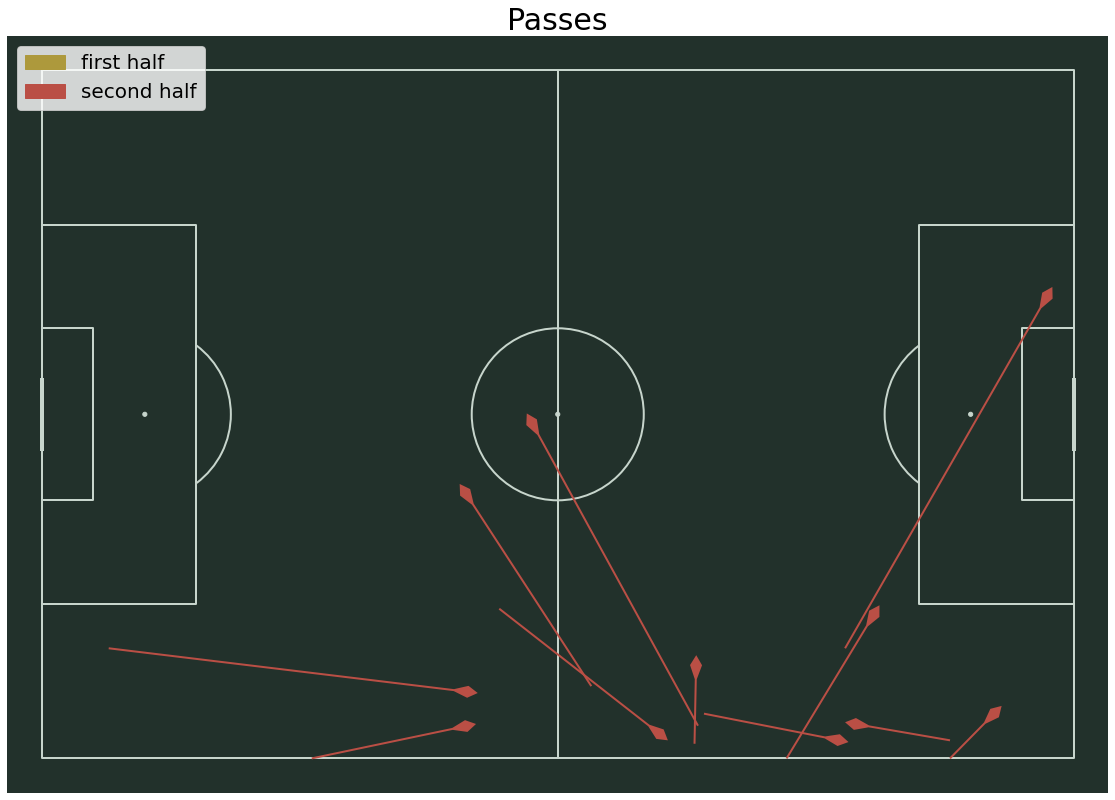

In [23]:
playerpasses_inhalves('Leah Williamson',wc19)

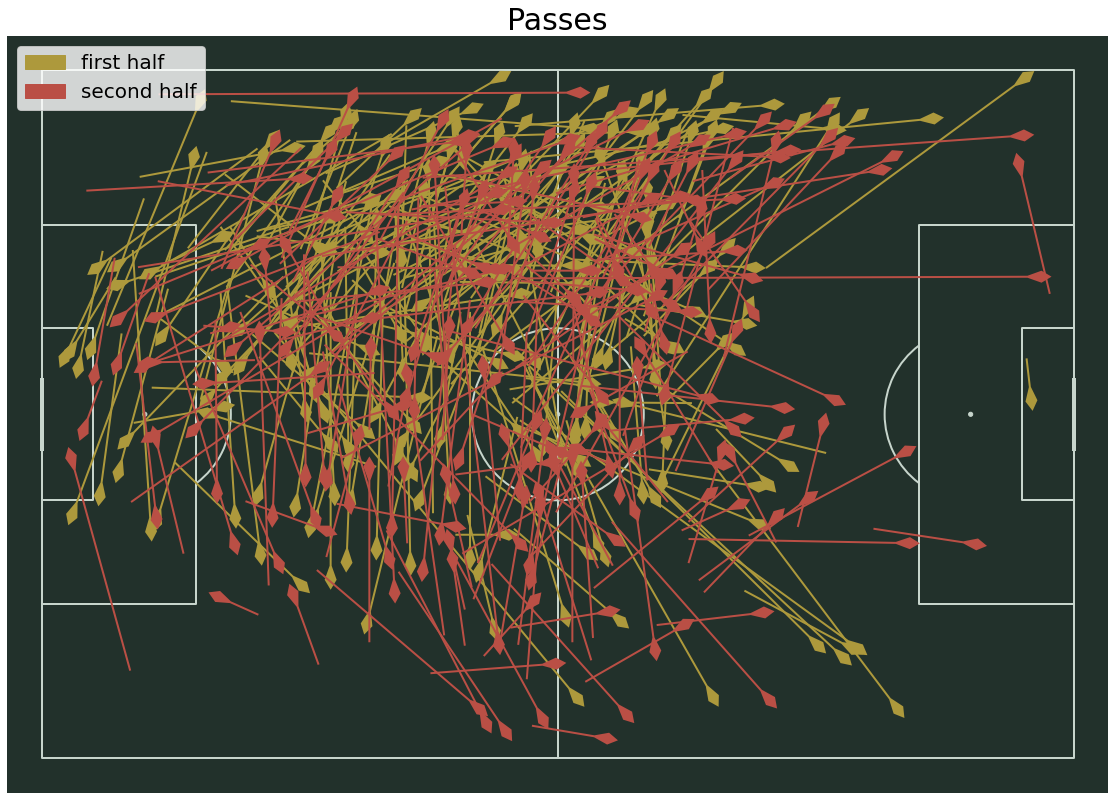

In [24]:
playerpasses_inhalves('Leah Williamson',euro22)

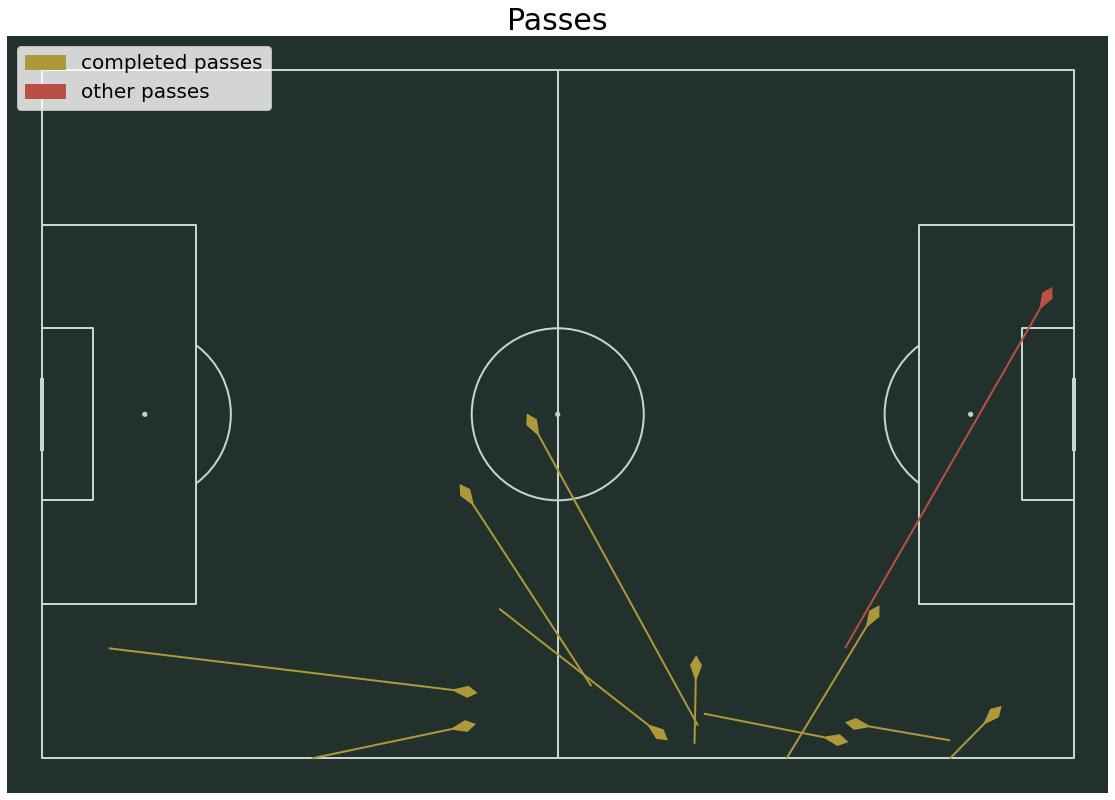

In [25]:
playerpasses('Leah Williamson',wc19)

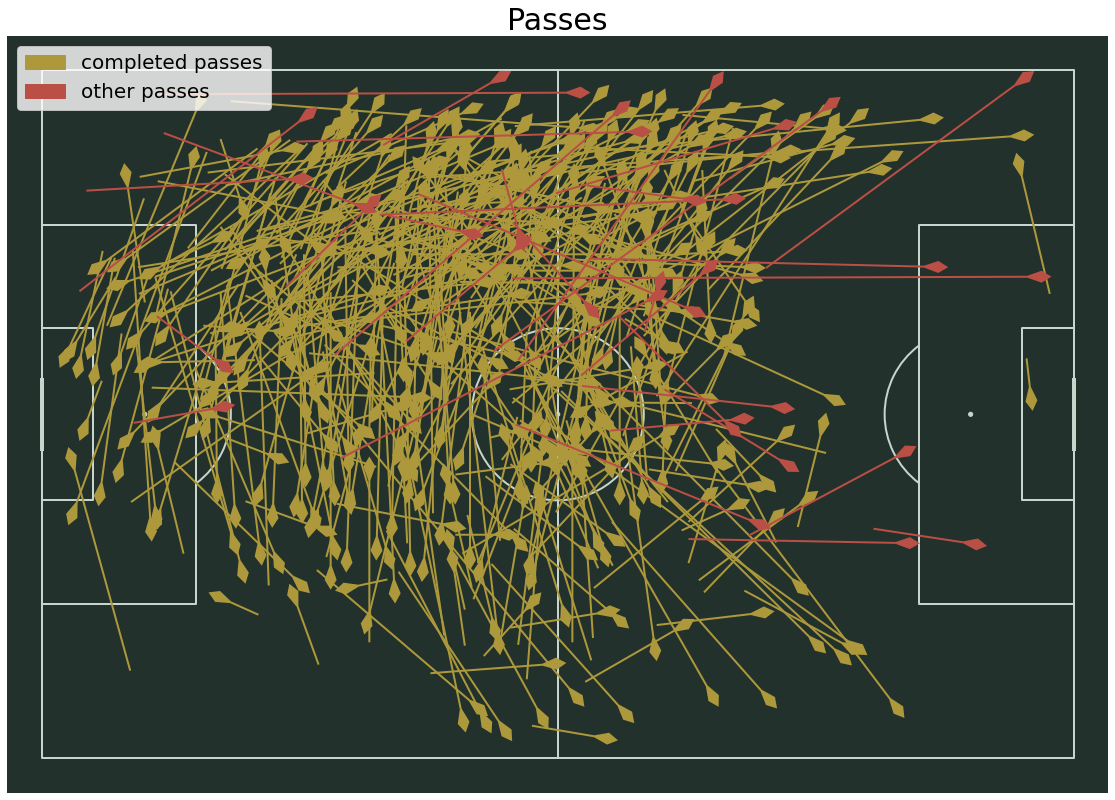

In [26]:
playerpasses('Leah Williamson',euro22)

### Kmeans - Leah Williamson EURO 22

In [27]:
passes = euro22[(euro22['player_id'] == 18999) & 
                  #(euro22['end_x'] > 60) &
                 (euro22['pass_outcome_Complete'] == 1)][columns_final]

In [28]:
passes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 5 to 26000
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pass_angle               462 non-null    float64
 1   pass_length              462 non-null    float64
 2   start_x                  462 non-null    float64
 3   start_y                  462 non-null    float64
 4   end_x                    462 non-null    float64
 5   end_y                    462 non-null    float64
 6   pass_height_Ground Pass  462 non-null    uint8  
 7   pass_height_High Pass    462 non-null    uint8  
 8   pass_height_Low Pass     462 non-null    uint8  
dtypes: float64(6), uint8(3)
memory usage: 26.6 KB


In [29]:
passes = euro22[(euro22['player_id'] == 18999) & 
                  (euro22['end_x'] > euro22['start_x'])  &
                 (euro22['pass_outcome_Complete'] == 1)][columns_final]

In [30]:
passes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 46 to 25993
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pass_angle               333 non-null    float64
 1   pass_length              333 non-null    float64
 2   start_x                  333 non-null    float64
 3   start_y                  333 non-null    float64
 4   end_x                    333 non-null    float64
 5   end_y                    333 non-null    float64
 6   pass_height_Ground Pass  333 non-null    uint8  
 7   pass_height_High Pass    333 non-null    uint8  
 8   pass_height_Low Pass     333 non-null    uint8  
dtypes: float64(6), uint8(3)
memory usage: 19.2 KB


In [31]:
passes = euro22[(euro22['player_id'] == 18999) & 
                  (euro22['end_x'] > 60) &
                 (euro22['pass_outcome_Complete'] == 1)][columns_final]

In [32]:
passes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 110 to 25977
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pass_angle               191 non-null    float64
 1   pass_length              191 non-null    float64
 2   start_x                  191 non-null    float64
 3   start_y                  191 non-null    float64
 4   end_x                    191 non-null    float64
 5   end_y                    191 non-null    float64
 6   pass_height_Ground Pass  191 non-null    uint8  
 7   pass_height_High Pass    191 non-null    uint8  
 8   pass_height_Low Pass     191 non-null    uint8  
dtypes: float64(6), uint8(3)
memory usage: 11.0 KB


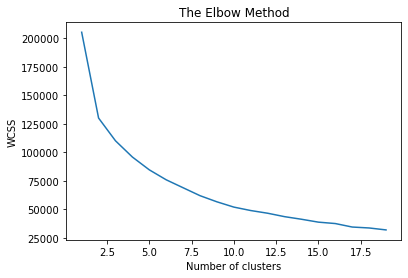

In [33]:
X = np.array(passes)


wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
N_clusters = 5
X = np.array(passes)

kmeans = KMeans(n_clusters = N_clusters, random_state = 42)
kmeans.fit(X)
cluster_labels = kmeans.predict(X)


In [35]:
kmeans.cluster_centers_

array([[-3.10477710e-01,  3.53992714e+01,  4.29285714e+01,
         2.17485714e+01,  7.34914286e+01,  1.19285714e+01,
         3.14285714e-01,  5.42857143e-01,  1.42857143e-01],
       [-4.03365668e-01,  1.59421832e+01,  6.77425000e+01,
         5.17200000e+01,  7.47925000e+01,  4.85275000e+01,
         9.25000000e-01,  5.00000000e-02,  2.50000000e-02],
       [ 7.51472280e-01,  1.57045343e+01,  6.30700000e+01,
         2.52340000e+01,  6.93640000e+01,  3.40980000e+01,
         8.60000000e-01,  8.00000000e-02,  6.00000000e-02],
       [ 9.26783451e-01,  4.21153175e+01,  5.58909091e+01,
         3.82272727e+01,  8.18090909e+01,  7.02727273e+01,
         3.63636364e-01,  5.45454545e-01,  9.09090909e-02],
       [-8.56273130e-01,  2.14372301e+01,  6.61236364e+01,
         2.46945455e+01,  7.80727273e+01,  1.04963636e+01,
         9.27272727e-01,  3.63636364e-02,  3.63636364e-02]])

In [36]:
passes['n_cluster'] = cluster_labels
passes.head(30)

,pass_angle,pass_length,start_x,start_y,end_x,end_y,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass,n_cluster
110,-0.124355,15.318290,56.4,18.5,71.6,16.6,1,0,0,4
116,0.373858,13.964598,57.0,16.6,70.0,21.7,1,0,0,2
158,0.492211,15.658863,81.7,60.5,95.5,67.9,1,0,0,1
168,-1.215380,24.426624,70.0,28.6,78.5,5.7,1,0,0,4
223,0.000000,9.500000,53.8,22.7,63.3,22.7,1,0,0,2
265,-1.110966,23.434164,72.4,47.2,82.8,26.2,1,0,0,1
322,-0.416513,23.728674,64.7,22.2,86.4,12.6,1,0,0,4
421,-0.483447,18.070970,56.1,22.7,72.1,14.3,1,0,0,4
430,0.060392,21.539267,55.3,26.9,76.8,28.2,1,0,0,2
536,0.051136,25.433247,35.4,16.5,60.8,17.8,1,0,0,0


In [37]:
passes['n_cluster'].value_counts()

4    55
2    50
1    40
0    35
3    11
Name: n_cluster, dtype: int64

In [38]:
sorted(passes['n_cluster'].unique())

[0, 1, 2, 3, 4]

reduced['cluster'] = clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

In [39]:
centroids = pd.DataFrame(data = kmeans.cluster_centers_, columns = columns_final)

In [40]:
centroids

,pass_angle,pass_length,start_x,start_y,end_x,end_y,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass
0,-0.310478,35.399271,42.928571,21.748571,73.491429,11.928571,0.314286,0.542857,0.142857
1,-0.403366,15.942183,67.742500,51.720000,74.792500,48.527500,0.925000,0.050000,0.025000
2,0.751472,15.704534,63.070000,25.234000,69.364000,34.098000,0.860000,0.080000,0.060000
3,0.926783,42.115317,55.890909,38.227273,81.809091,70.272727,0.363636,0.545455,0.090909
4,-0.856273,21.437230,66.123636,24.694545,78.072727,10.496364,0.927273,0.036364,0.036364


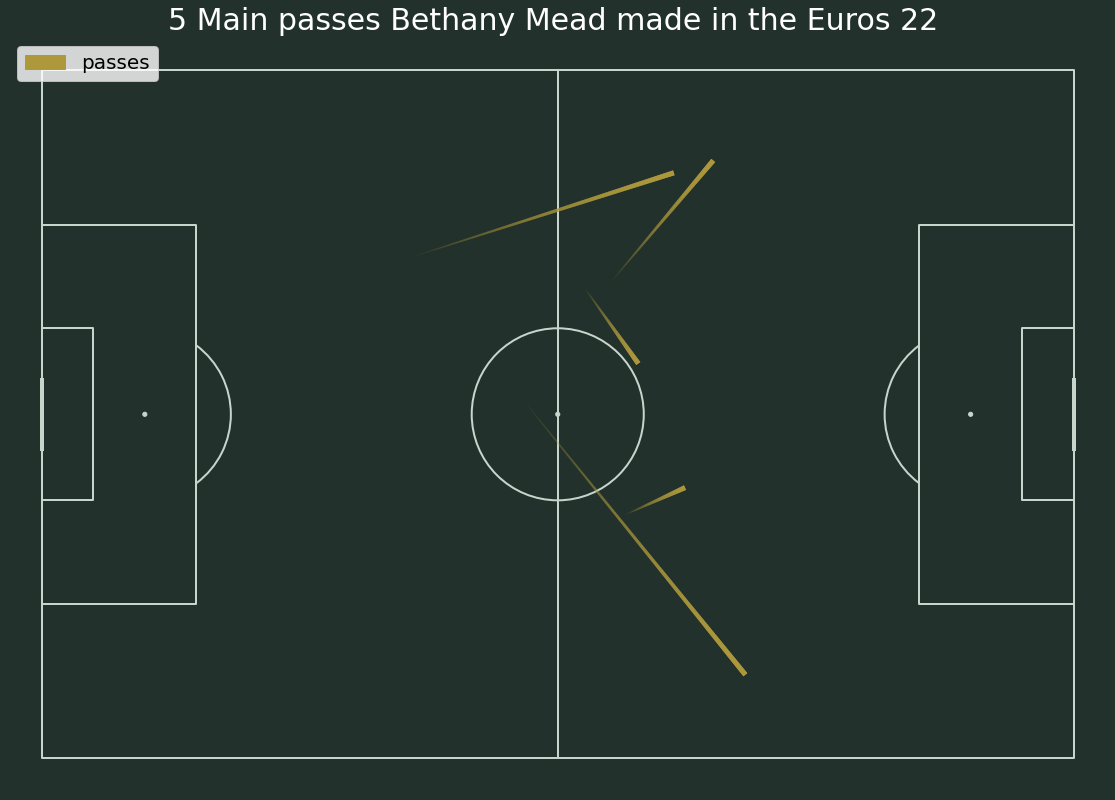

In [41]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)

lc1 = pitch.lines(centroids['start_x'], centroids['start_y'],
                  centroids['end_x'], centroids['end_y'],
                  lw=5, transparent=True, comet=True,
                  color='#ad993c', ax=ax)
# Plot the legend
red_patch = mpatches.Patch(color='#ad993c', label='passes')
ax.legend(handles=[red_patch], fontsize=20, loc='upper left')
# Set the title
ax.set_title(f'5 Main passes Bethany Mead made in the Euros 22 ', fontsize=30, color = 'white')
# Set the figure facecolor
fig.set_facecolor('#22312b')

In [42]:
passes['n_cluster'].value_counts()

4    55
2    50
1    40
0    35
3    11
Name: n_cluster, dtype: int64

In [43]:
#passes = euro22[euro22.player == 'Bethany Mead']
passes_0 = passes[passes.n_cluster == 0]
passes_0

,pass_angle,pass_length,start_x,start_y,end_x,end_y,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass,n_cluster
536,0.051136,25.433247,35.4,16.5,60.8,17.8,1,0,0,0
602,-0.266564,28.092169,43.4,15.0,70.5,7.6,0,0,1,0
676,0.000000,26.800000,42.9,21.4,69.7,21.4,1,0,0,0
851,-0.082614,31.507460,55.0,6.5,86.4,3.9,0,1,0,0
893,-0.218087,55.924683,25.9,18.6,80.5,6.5,0,1,0,0
898,0.507451,27.574808,48.0,9.4,72.1,22.8,0,0,1,0
1027,0.105489,34.190056,31.1,32.9,65.1,36.5,0,0,1,0
1086,-1.146987,38.177612,56.8,36.9,72.5,2.1,1,0,0,0
1191,-0.337308,22.360008,41.6,15.0,62.7,7.6,1,0,0,0
1453,-0.867720,21.498140,48.2,24.6,62.1,8.2,1,0,0,0


In [44]:
def plot_clusters(df, name):
    n_clusters = passes['n_cluster'].nunique()
    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(10, 10), constrained_layout=True, tight_layout=False)
    
    colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters))
    
    for lbl, col in zip(passes['n_cluster'].unique(), colors):
        #df_cluster = passes[passes['n_cluster'] == lbl]
        lc1 = pitch.arrows(passes[passes['n_cluster'] == lbl]['start_x'], 
                    passes[passes['n_cluster'] == lbl]['start_y'],
                    passes[passes['n_cluster'] == lbl]['end_x'],
                    passes[passes['n_cluster'] == lbl]['end_y'],
                    width=2,headwidth=6, headlength=5, headaxislength=12,color=col,ax=ax,
                       label=lbl)

    ax.legend(loc='lower right')
    ax.set_title(name, fontsize=20, color = 'w')
    plt.show()

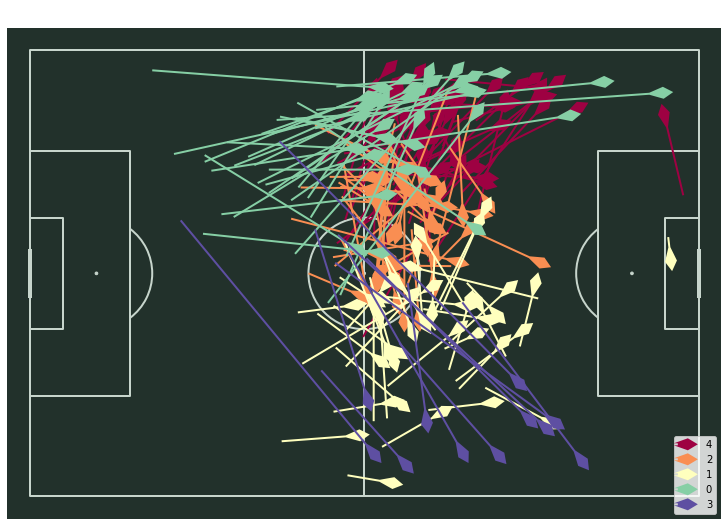

In [45]:
plot_clusters(passes, 'Leah Williamson')

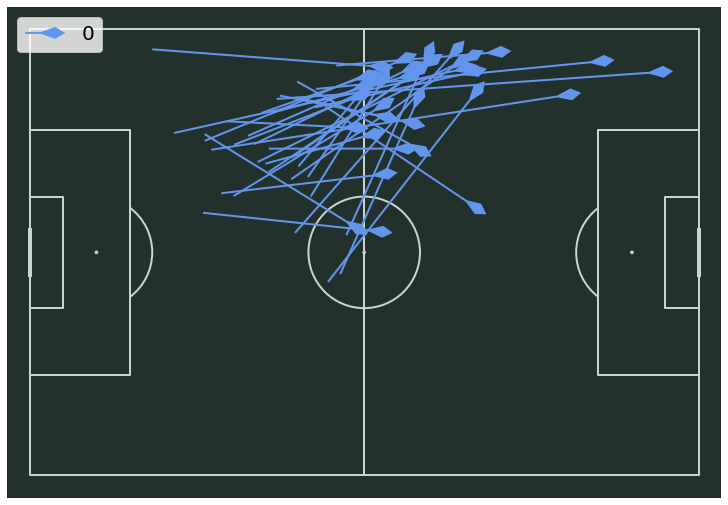

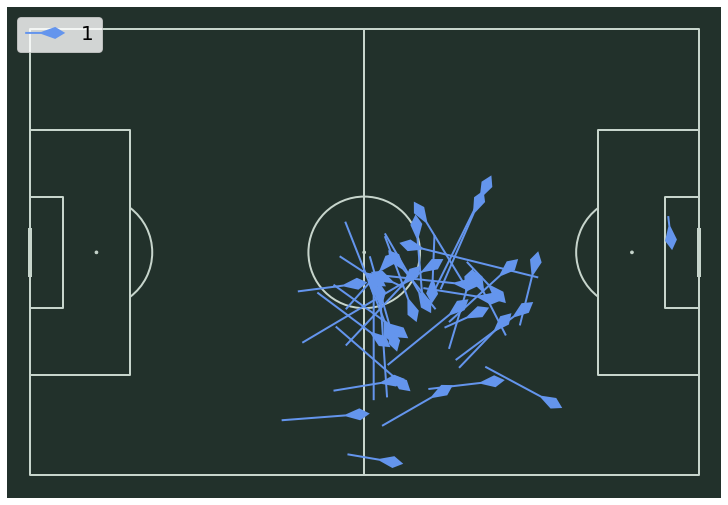

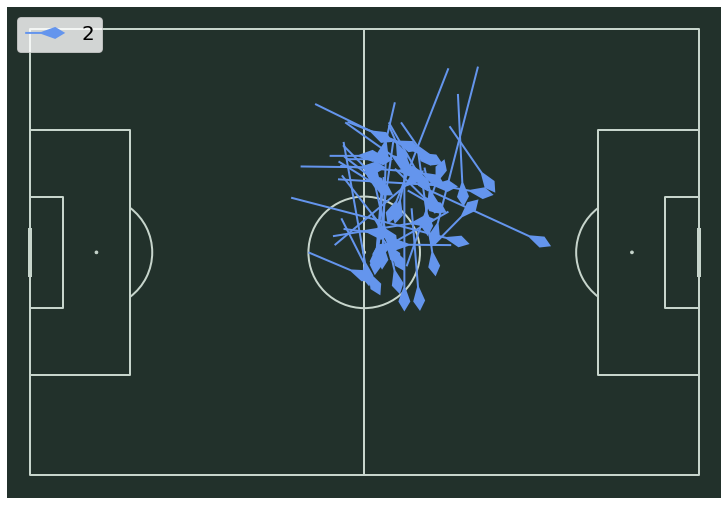

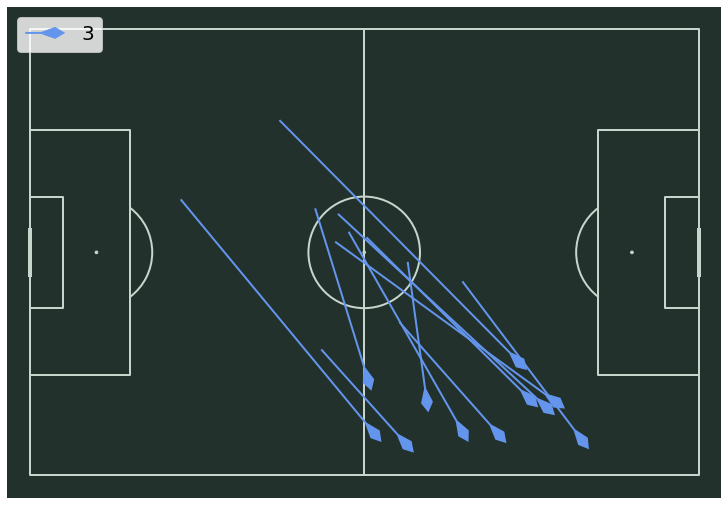

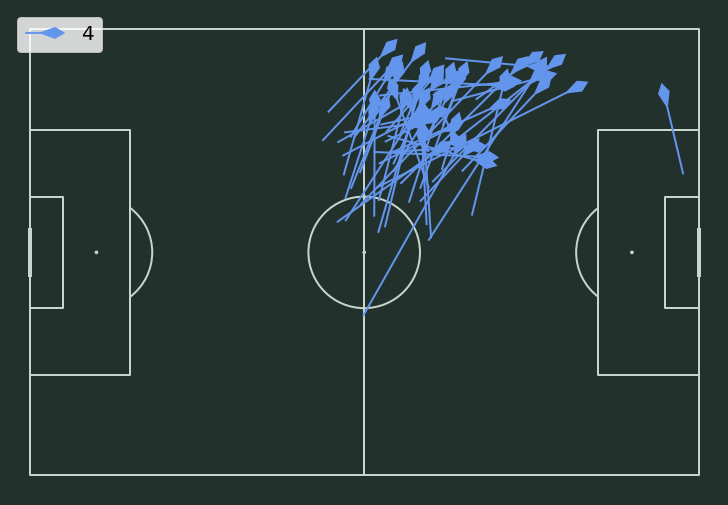

In [61]:
# pulling out passes for analysis by cluster

for c in sorted(passes['n_cluster'].unique()) :
    
    pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
    fig, ax = pitch.draw(figsize=(10, 10), constrained_layout=True, tight_layout=False)

    lc1 = pitch.arrows(passes[passes['n_cluster'] == c]['start_x'], 
                      passes[passes['n_cluster'] == c]['start_y'],
                      passes[passes['n_cluster'] == c]['end_x'],
                      passes[passes['n_cluster'] == c]['end_y'],
                      width=2,headwidth=6, headlength=5, headaxislength=12,color='cornflowerblue',ax=ax,
                       label=c)
# Plot the legend

    ax.legend(fontsize=20, loc='upper left')
# Set the title
#ax.set_title(f'5 Main passes Bethany Mead made in the past 3 years ', fontsize=30, color = 'white')
# Set the figure facecolor
fig.set_facecolor('#22312b')
    


In [62]:
def pass_analysis(cluster,df):
    df = df[df.n_cluster == cluster]
    
    analysis = euro22.iloc[df.index]
    
    return analysis

In [63]:
analysis_1 = pass_analysis(1,passes)

In [76]:
analysis_1.describe()

,period,pass_angle,pass_length,possession_team_id,player_id,match_id,pass_outcome_Complete,pass_outcome_Incomplete,pass_outcome_Injury Clearance,pass_outcome_Out,pass_outcome_Pass Offside,pass_outcome_Unknown,start_x,start_y,end_x,end_y,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass
count,40.000000,40.000000,40.000000,40.0,40.0,4.000000e+01,40.0,40.0,40.0,40.0,40.0,40.0,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000
mean,1.675000,-0.403366,15.942183,865.0,18999.0,3.836680e+06,1.0,0.0,0.0,0.0,0.0,0.0,67.742500,51.720000,74.79250,48.527500,0.925000,0.050000,0.025000
std,0.474342,1.176776,4.917009,0.0,0.0,3.636093e+03,0.0,0.0,0.0,0.0,0.0,0.0,13.583774,10.653113,11.69364,11.308925,0.266747,0.220721,0.158114
min,1.000000,-2.897559,6.140033,865.0,18999.0,3.835319e+06,1.0,0.0,0.0,0.0,0.0,0.0,45.200000,33.500000,60.60000,26.200000,0.000000,0.000000,0.000000
25%,1.000000,-1.190500,13.471738,865.0,18999.0,3.835335e+06,1.0,0.0,0.0,0.0,0.0,0.0,56.700000,45.475000,65.87500,41.200000,1.000000,0.000000,0.000000
50%,2.000000,-0.472270,15.752184,865.0,18999.0,3.835335e+06,1.0,0.0,0.0,0.0,0.0,0.0,65.550000,50.200000,71.05000,47.250000,1.000000,0.000000,0.000000
75%,2.000000,0.588014,18.642602,865.0,18999.0,3.835335e+06,1.0,0.0,0.0,0.0,0.0,0.0,75.200000,59.525000,82.50000,55.625000,1.000000,0.000000,0.000000
max,2.000000,1.611424,29.412413,865.0,18999.0,3.847567e+06,1.0,0.0,0.0,0.0,0.0,0.0,114.500000,76.200000,115.20000,77.900000,1.000000,1.000000,1.000000


In [64]:
analysis_1.match_id.value_counts()

3835335    32
3835319     2
3847567     2
3845506     2
3835327     1
3844384     1
Name: match_id, dtype: int64

In [65]:
analysis_1.pass_recipient.value_counts()

Keira Walsh        7
Ella Toone         6
Alex Greenwood     5
Francesca Kirby    5
Bethany Mead       4
Georgia Stanway    4
Millie Bright      3
Lucy Bronze        2
Jessica Carter     1
Lauren Hemp        1
Rachel Daly        1
Alessia Russo      1
Name: pass_recipient, dtype: int64

In [77]:
analysis_2 = pass_analysis(2,passes)
analysis_2.describe() 

,period,pass_angle,pass_length,possession_team_id,player_id,match_id,pass_outcome_Complete,pass_outcome_Incomplete,pass_outcome_Injury Clearance,pass_outcome_Out,pass_outcome_Pass Offside,pass_outcome_Unknown,start_x,start_y,end_x,end_y,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass
count,50.000000,50.000000,50.000000,50.000000,50.0,5.000000e+01,50.0,50.0,50.0,50.0,50.0,50.0,50.000000,50.000000,50.00000,50.000000,50.00000,50.000000,50.000000
mean,1.540000,0.751472,15.704534,864.860000,18999.0,3.838206e+06,1.0,0.0,0.0,0.0,0.0,0.0,63.070000,25.234000,69.36400,34.098000,0.86000,0.080000,0.060000
std,0.613122,0.956134,6.743810,0.989949,0.0,4.719366e+03,0.0,0.0,0.0,0.0,0.0,0.0,8.067123,8.424275,6.86255,8.578128,0.35051,0.274048,0.239898
min,1.000000,-3.133189,6.811755,858.000000,18999.0,3.835319e+06,1.0,0.0,0.0,0.0,0.0,0.0,46.900000,6.700000,60.90000,20.200000,0.00000,0.000000,0.000000
25%,1.000000,0.283801,10.459094,865.000000,18999.0,3.835319e+06,1.0,0.0,0.0,0.0,0.0,0.0,56.225000,20.200000,63.90000,26.150000,1.00000,0.000000,0.000000
50%,1.500000,0.846496,14.578543,865.000000,18999.0,3.835327e+06,1.0,0.0,0.0,0.0,0.0,0.0,64.100000,24.800000,67.45000,33.100000,1.00000,0.000000,0.000000
75%,2.000000,1.474930,20.332636,865.000000,18999.0,3.844384e+06,1.0,0.0,0.0,0.0,0.0,0.0,68.325000,30.275000,72.80000,41.750000,1.00000,0.000000,0.000000
max,4.000000,2.629550,33.349360,865.000000,18999.0,3.847567e+06,1.0,0.0,0.0,0.0,0.0,0.0,80.400000,42.500000,93.50000,50.600000,1.00000,1.000000,1.000000


In [67]:
analysis_2.match_id.value_counts()

3835319    16
3835327    10
3835335    10
3844384     6
3847567     4
3845506     4
Name: match_id, dtype: int64

In [68]:
analysis_2.describe()

,period,pass_angle,pass_length,possession_team_id,player_id,match_id,pass_outcome_Complete,pass_outcome_Incomplete,pass_outcome_Injury Clearance,pass_outcome_Out,pass_outcome_Pass Offside,pass_outcome_Unknown,start_x,start_y,end_x,end_y,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass
count,50.000000,50.000000,50.000000,50.000000,50.0,5.000000e+01,50.0,50.0,50.0,50.0,50.0,50.0,50.000000,50.000000,50.00000,50.000000,50.00000,50.000000,50.000000
mean,1.540000,0.751472,15.704534,864.860000,18999.0,3.838206e+06,1.0,0.0,0.0,0.0,0.0,0.0,63.070000,25.234000,69.36400,34.098000,0.86000,0.080000,0.060000
std,0.613122,0.956134,6.743810,0.989949,0.0,4.719366e+03,0.0,0.0,0.0,0.0,0.0,0.0,8.067123,8.424275,6.86255,8.578128,0.35051,0.274048,0.239898
min,1.000000,-3.133189,6.811755,858.000000,18999.0,3.835319e+06,1.0,0.0,0.0,0.0,0.0,0.0,46.900000,6.700000,60.90000,20.200000,0.00000,0.000000,0.000000
25%,1.000000,0.283801,10.459094,865.000000,18999.0,3.835319e+06,1.0,0.0,0.0,0.0,0.0,0.0,56.225000,20.200000,63.90000,26.150000,1.00000,0.000000,0.000000
50%,1.500000,0.846496,14.578543,865.000000,18999.0,3.835327e+06,1.0,0.0,0.0,0.0,0.0,0.0,64.100000,24.800000,67.45000,33.100000,1.00000,0.000000,0.000000
75%,2.000000,1.474930,20.332636,865.000000,18999.0,3.844384e+06,1.0,0.0,0.0,0.0,0.0,0.0,68.325000,30.275000,72.80000,41.750000,1.00000,0.000000,0.000000
max,4.000000,2.629550,33.349360,865.000000,18999.0,3.847567e+06,1.0,0.0,0.0,0.0,0.0,0.0,80.400000,42.500000,93.50000,50.600000,1.00000,1.000000,1.000000


In [69]:
analysis_2.pass_recipient.value_counts()

Keira Walsh        18
Millie Bright      13
Francesca Kirby     5
Georgia Stanway     5
Ellen White         3
Ella Toone          3
Alessia Russo       2
Alex Greenwood      1
Name: pass_recipient, dtype: int64

In [78]:
analysis_4 = pass_analysis(4,passes)
analysis_4.describe() 

,period,pass_angle,pass_length,possession_team_id,player_id,match_id,pass_outcome_Complete,pass_outcome_Incomplete,pass_outcome_Injury Clearance,pass_outcome_Out,pass_outcome_Pass Offside,pass_outcome_Unknown,start_x,start_y,end_x,end_y,pass_height_Ground Pass,pass_height_High Pass,pass_height_Low Pass
count,55.000000,55.000000,55.000000,55.0,55.0,5.500000e+01,55.0,55.0,55.0,55.0,55.0,55.0,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,1.563636,-0.856273,21.437230,865.0,18999.0,3.839833e+06,1.0,0.0,0.0,0.0,0.0,0.0,66.123636,24.694545,78.072727,10.496364,0.927273,0.036364,0.036364
std,0.536230,0.595851,7.698334,0.0,0.0,5.220551e+03,0.0,0.0,0.0,0.0,0.0,0.0,9.946206,8.418859,10.976363,5.586490,0.262082,0.188919,0.188919
min,1.000000,-1.943784,6.603030,865.0,18999.0,3.835319e+06,1.0,0.0,0.0,0.0,0.0,0.0,52.500000,5.200000,61.900000,1.700000,0.000000,0.000000,0.000000
25%,1.000000,-1.260100,16.014472,865.0,18999.0,3.835327e+06,1.0,0.0,0.0,0.0,0.0,0.0,59.550000,19.400000,70.400000,6.050000,1.000000,0.000000,0.000000
50%,2.000000,-0.924494,21.052317,865.0,18999.0,3.835335e+06,1.0,0.0,0.0,0.0,0.0,0.0,64.200000,24.200000,76.100000,9.400000,1.000000,0.000000,0.000000
75%,2.000000,-0.473547,25.907252,865.0,18999.0,3.845506e+06,1.0,0.0,0.0,0.0,0.0,0.0,71.500000,30.600000,85.300000,14.350000,1.000000,0.000000,0.000000
max,3.000000,1.122958,42.485290,865.0,18999.0,3.847567e+06,1.0,0.0,0.0,0.0,0.0,0.0,117.200000,51.400000,113.300000,24.500000,1.000000,1.000000,1.000000


In [71]:
analysis_4.match_id.value_counts()

3835327    13
3835319    13
3845506    13
3844384     6
3847567     5
3835335     5
Name: match_id, dtype: int64

In [79]:
analysis_4.pass_recipient.value_counts()

Rachel Daly        24
Lauren Hemp         8
Alex Greenwood      7
Ella Toone          6
Francesca Kirby     4
Bethany Mead        3
Chloe Kelly         2
Georgia Stanway     1
Name: pass_recipient, dtype: int64

In [73]:
analysis_2.pass_recipient.value_counts()

Keira Walsh        18
Millie Bright      13
Francesca Kirby     5
Georgia Stanway     5
Ellen White         3
Ella Toone          3
Alessia Russo       2
Alex Greenwood      1
Name: pass_recipient, dtype: int64

In [74]:
silhouette_score(X, cluster_labels)

0.22235764963214935

### DBScan

In [75]:
X_1 = np.array(pd_plot[columns_final])

NameError: name 'pd_plot' is not defined

In [ ]:
ss = StandardScaler()
X_scaled = ss.fit_transform(df)

dbscan = DBSCAN()
dbscan.fit(X_scaled);